In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
with open('blochain_data.json', 'r') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()
len(data)

500000

In [5]:
# # Plot a bar graph of the transaction count
# plt.figure(figsize=(10,6))  # Increase the size of the plot
# plt.bar(df['hash'], df['transactionCount'])
# plt.xlabel('Hash')
# plt.ylabel('Transaction Count')
# plt.title('Transaction Count per Hash')
# plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
# plt.show()

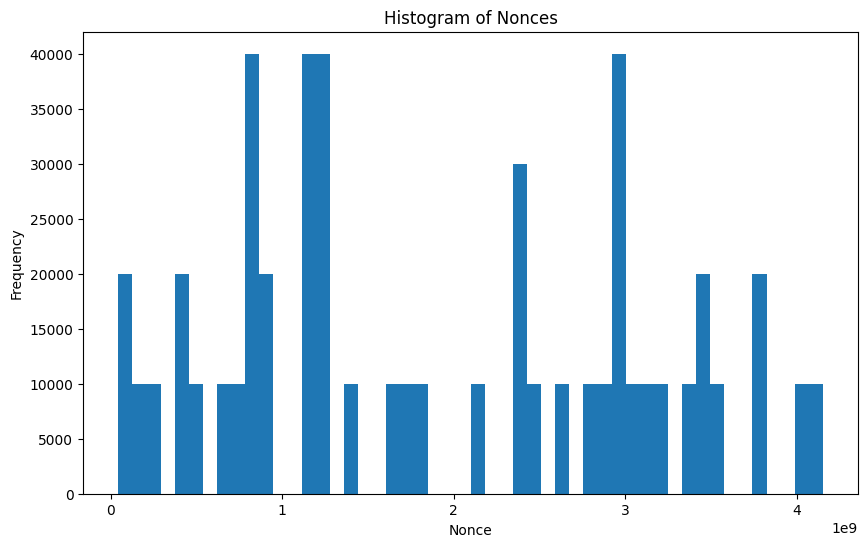

In [27]:
# Histogram of Nonces
plt.figure(figsize=(10,6))
plt.hist(df['nonce'], bins=50)
plt.xlabel('Nonce')
plt.ylabel('Frequency')
plt.title('Histogram of Nonces')
plt.show()

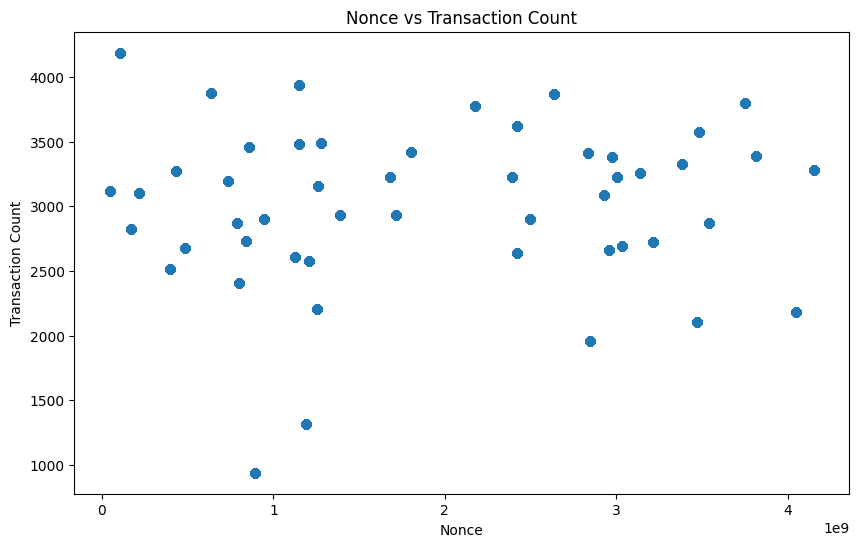

In [28]:
# Scatter Plot of Nonce vs Transaction Count
plt.figure(figsize=(10,6))
plt.scatter(df['nonce'], df['transactionCount'])
plt.xlabel('Nonce')
plt.ylabel('Transaction Count')
plt.title('Nonce vs Transaction Count')
plt.show()

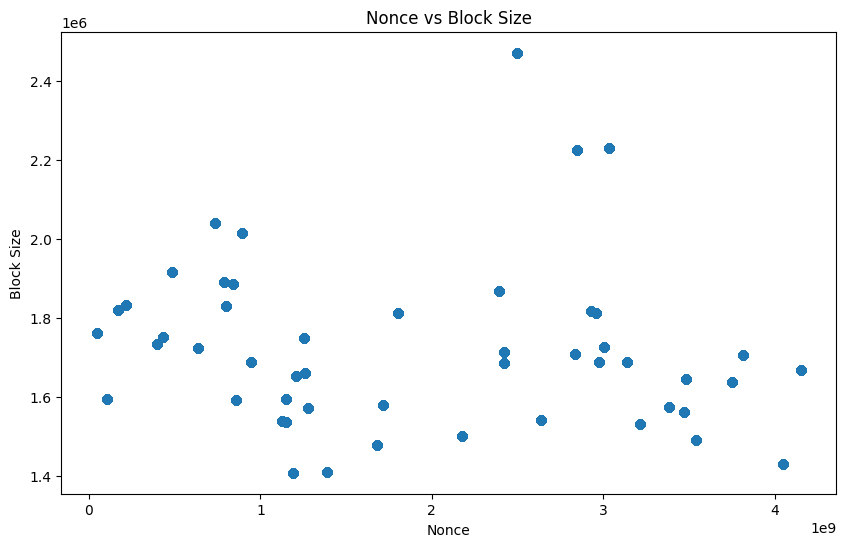

In [29]:
# Scatter Plot of Nonce vs Block Size
plt.figure(figsize=(10,6))
plt.scatter(df['nonce'], df['size'])
plt.xlabel('Nonce')
plt.ylabel('Block Size')
plt.title('Nonce vs Block Size')
plt.show()

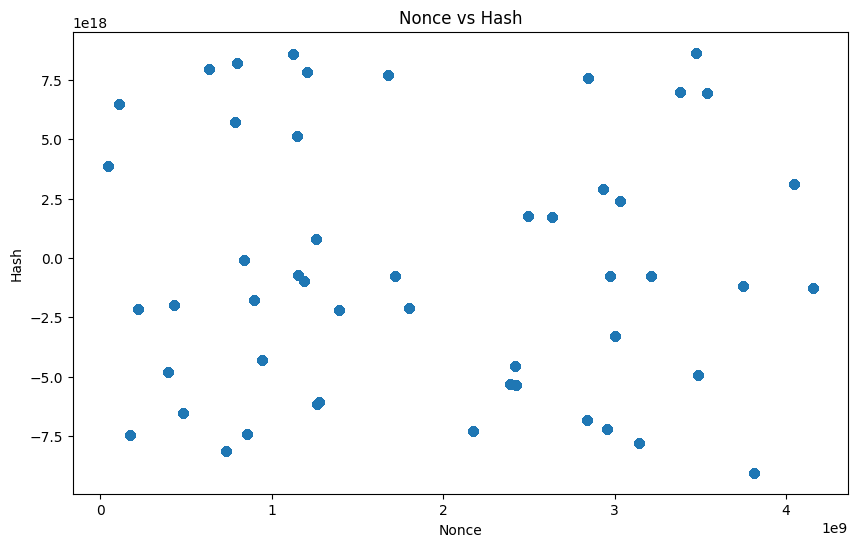

In [6]:
# Convert hash to numerical form
df['hash_num'] = df['hash'].apply(hash)

# Scatter Plot of Nonce vs Hash
plt.figure(figsize=(10,6))
plt.scatter(df['nonce'], df['hash_num'])
plt.xlabel('Nonce')
plt.ylabel('Hash')
plt.title('Nonce vs Hash')
plt.show()

In [7]:
# Define the number of bins
num_bins = 10

# Create bins for the nonce values
df['nonce_bins'] = pd.cut(df['nonce'], bins=num_bins)

# Count the frequency of each bin
nonce_frequency = df['nonce_bins'].value_counts()

# Find the bin with the highest frequency
most_frequent_bin = nonce_frequency.idxmax()

print(f"The range of nonces that occurs most frequently is: {most_frequent_bin}")

The range of nonces that occurs most frequently is: (866622858.4, 1277545956.6]


The range of nonces that occurs most frequently is: (1236453646.78, 1277545956.6]


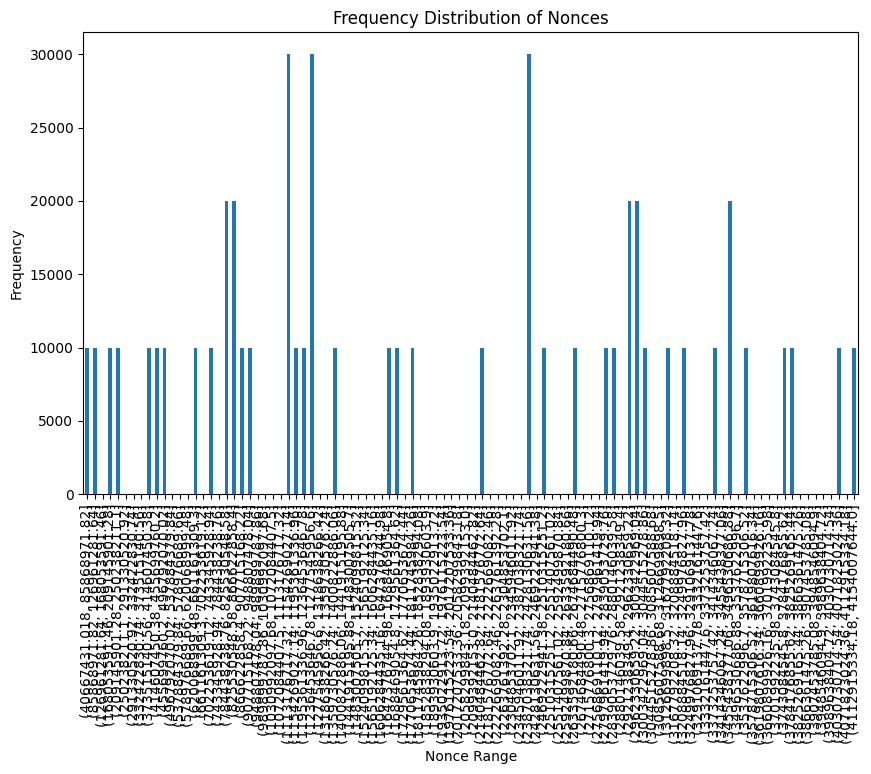

In [8]:
# Define the number of bins
num_bins = 100

# Create bins for the nonce values
df['nonce_bins'] = pd.cut(df['nonce'], bins=num_bins)

# Count the frequency of each bin
nonce_frequency = df['nonce_bins'].value_counts()

# Find the bin with the highest frequency
most_frequent_bin = nonce_frequency.idxmax()

print(f"The range of nonces that occurs most frequently is: {most_frequent_bin}")

# Plot the frequency distribution of the nonce values
plt.figure(figsize=(10,6))
nonce_frequency.sort_index().plot(kind='bar')
plt.xlabel('Nonce Range')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Nonces')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()

In [9]:
# get a count of the rows where nonce is 10 digits. Alos, compare the frequency of the nonce digits lenghts
df['nonce_length'] = df['nonce'].astype(str).apply(len)
print(df['nonce_length'].value_counts())



nonce_length
10    350000
9     140000
8      10000
Name: count, dtype: int64


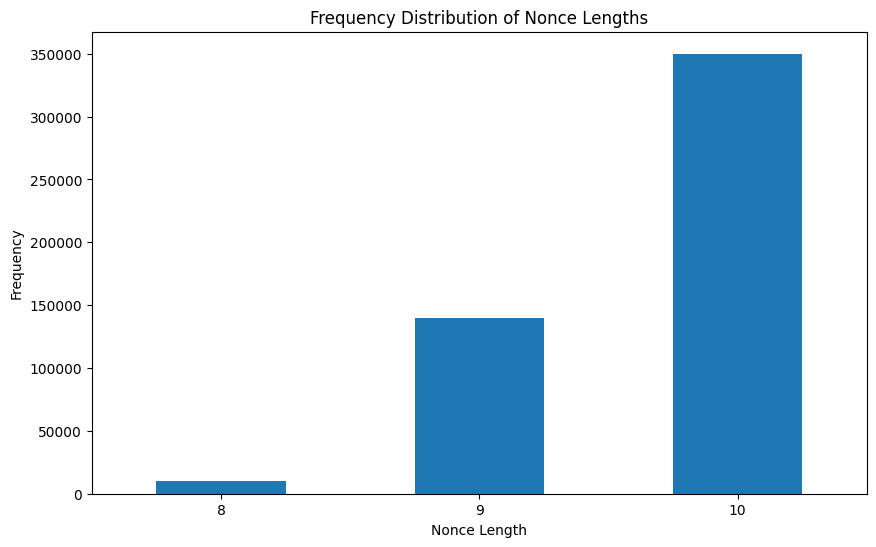

In [10]:
# Plot the frequency distribution of the nonce length
plt.figure(figsize=(10,6))
df['nonce_length'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Nonce Length')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Nonce Lengths')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better visibility
plt.show()


The range of nonces that occurs most frequently is: (1236453646.78, 1277545956.6]


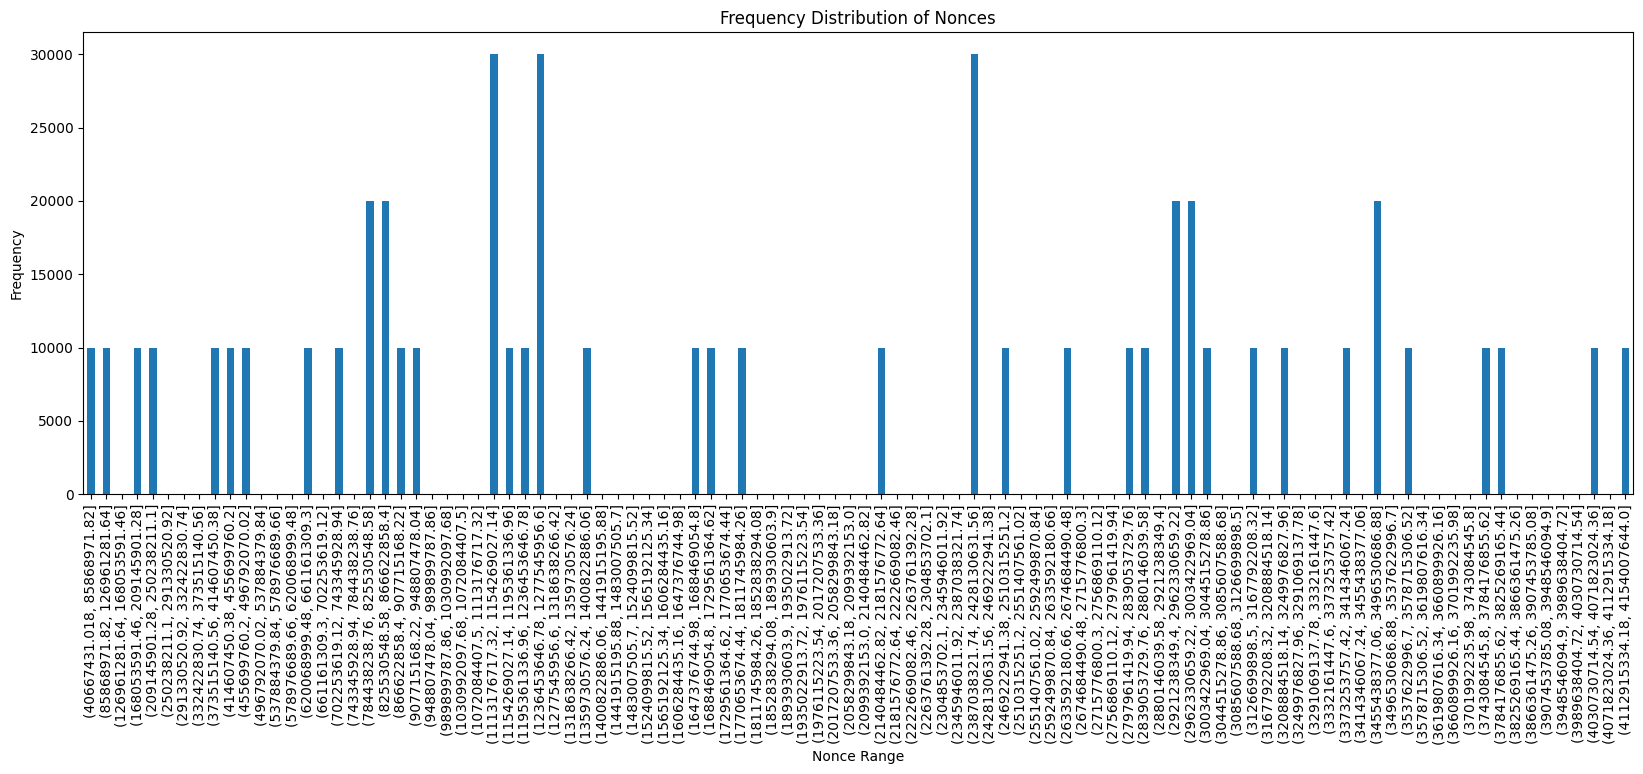

In [11]:
#i see 9 and 10 and the most occuring. now futher break down the range of numbers between 9 and 10 so i can see which range of numbers occur most frequently
# Define the number of bins
num_bins = 100

# Create bins for the nonce values
df['nonce_bins'] = pd.cut(df['nonce'], bins=num_bins)

# Count the frequency of each bin
nonce_frequency = df['nonce_bins'].value_counts()

# Find the bin with the highest frequency
most_frequent_bin = nonce_frequency.idxmax()

print(f"The range of nonces that occurs most frequently is: {most_frequent_bin}")

# Plot the frequency distribution of ht nonce values om heat map
plt.figure(figsize=(20,6))
nonce_frequency.sort_index().plot(kind='bar')
plt.xlabel('Nonce Range')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Nonces')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()




The range of nonces that occurs most frequently is: (1123357566.545, 1429147434.5]
nonce_bins
(1123357566.545, 1429147434.5]    90000
(2942958662.0, 3245720907.5]      60000
(2337434171.0, 2640196416.5]      50000
(3245720907.5, 3548483153.0]      40000
(2640196416.5, 2942958662.0]      30000
(1429147434.5, 1731909680.0]      20000
(3548483153.0, 3851245398.5]      20000
(3851245398.5, 4154007644.0]      20000
(1731909680.0, 2034671925.5]      10000
(2034671925.5, 2337434171.0]      10000
Name: count, dtype: int64
nonce_bins
(1123357566.545, 1429147434.5]    25.714286
(2942958662.0, 3245720907.5]      17.142857
(2337434171.0, 2640196416.5]      14.285714
(3245720907.5, 3548483153.0]      11.428571
(2640196416.5, 2942958662.0]       8.571429
(1429147434.5, 1731909680.0]       5.714286
(3548483153.0, 3851245398.5]       5.714286
(3851245398.5, 4154007644.0]       5.714286
(1731909680.0, 2034671925.5]       2.857143
(2034671925.5, 2337434171.0]       2.857143
Name: count, dtype: float64


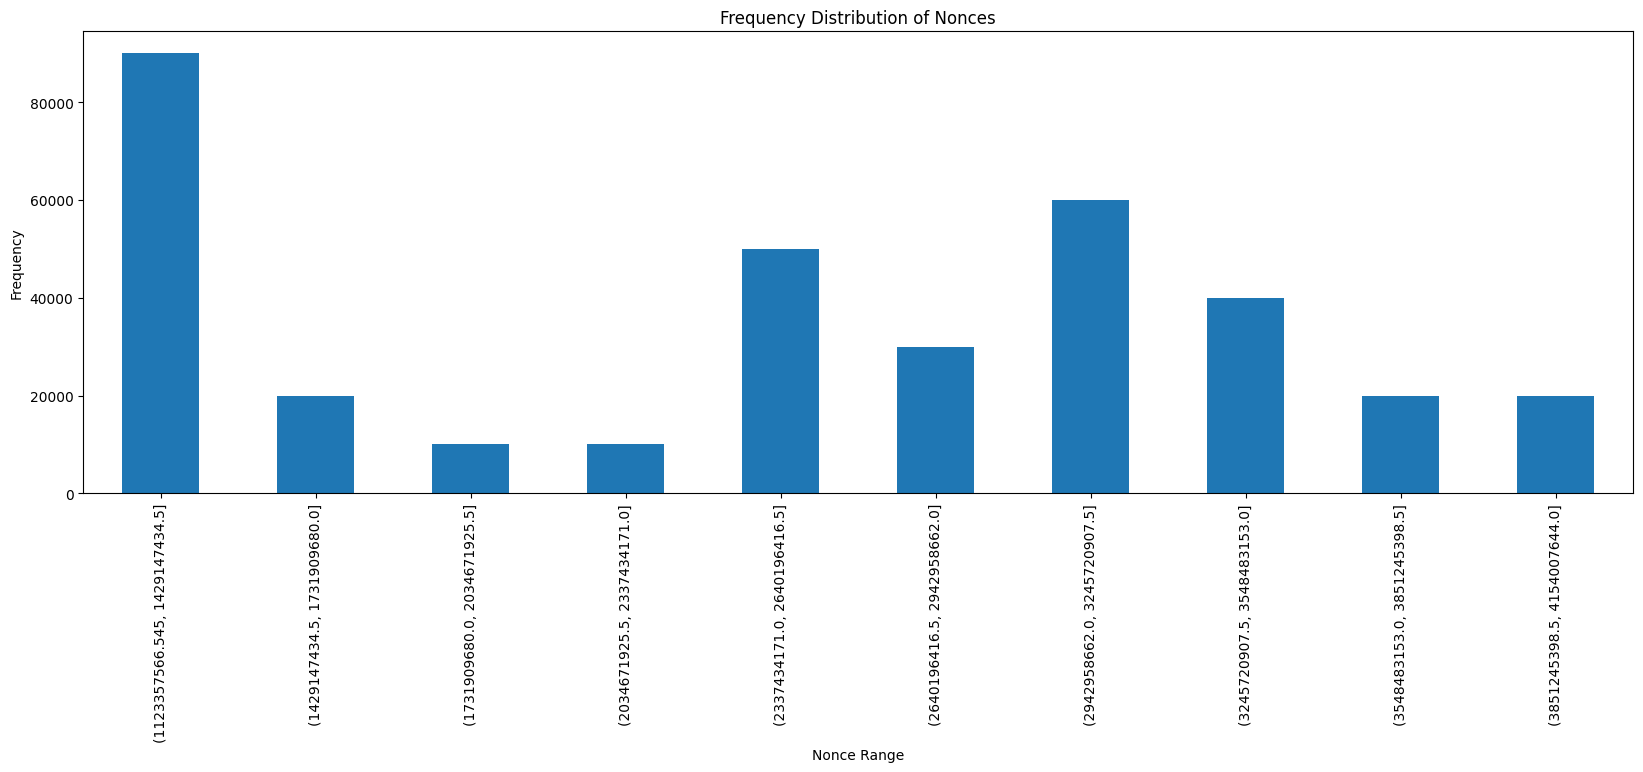

In [22]:
# check all the coulms that have nonce where the length is 10


# check for the range of most occuring values with nonce length of 10
df['nonce_bins'] = pd.cut(df[df['nonce_length'] == 10]['nonce'], bins=10)

# Count the frequency of each bin
nonce_frequency = df['nonce_bins'].value_counts()

# Find the bin with the highest frequency
most_frequent_bin = nonce_frequency.idxmax()

print(f"The range of nonces that occurs most frequently is: {most_frequent_bin}")

# print the number of nonces that fell within the range of the most occuring nonce
print(nonce_frequency)

# show the percentage of the most occuring nonce
print(nonce_frequency/nonce_frequency.sum() * 100)

# Plot the frequency distribution of the nonce values
plt.figure(figsize=(20,6))
nonce_frequency.sort_index().plot(kind='bar')
plt.xlabel('Nonce Range')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Nonces')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better visibility
plt.show()
